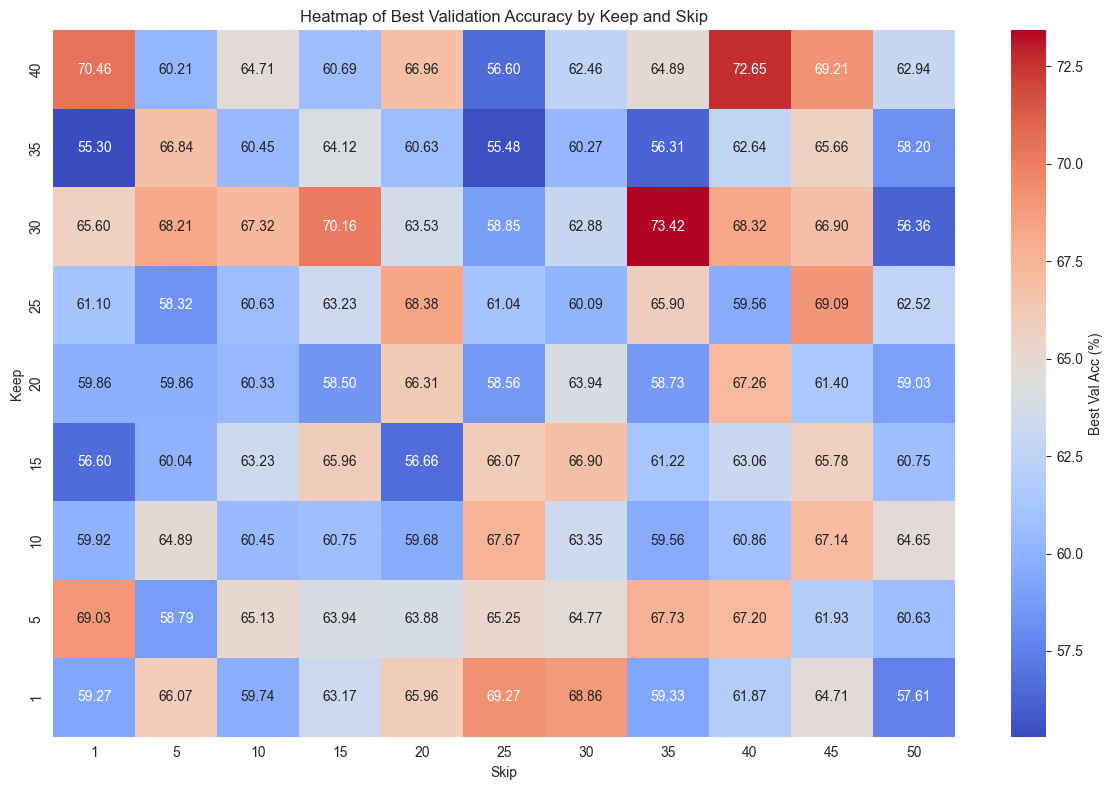

In [2]:
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Carica e leggi il file di log
file_path = "2025-06-11_20-46-46.log"
with open(file_path, "r") as file:
    log_data = file.read()

# Estrai i parametri keep, skip e Best val acc
pattern = r"Filtered with filter Stride Kernel with parameters: keep = (\d+) skip = (\d+).*?Best val acc: (\d+\.\d+)%"
matches = re.findall(pattern, log_data, re.DOTALL)

# Crea un DataFrame
data = pd.DataFrame(matches, columns=["keep", "skip", "best_val_acc"])
data = data.astype({"keep": int, "skip": int, "best_val_acc": float})

# Crea una tabella pivot per la heatmap (usando 'max' per evitare il FutureWarning)
heatmap_data = data.pivot_table(index="keep", columns="skip", values="best_val_acc", aggfunc="max")

# Ordina i valori di keep in ordine decrescente
heatmap_data_sorted = heatmap_data.sort_index(ascending=False)

# Plot della heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data_sorted, annot=True, fmt=".2f", cmap="coolwarm", cbar_kws={'label': 'Best Val Acc (%)'})
plt.title("Heatmap of Best Validation Accuracy by Keep and Skip")
plt.xlabel("Skip")
plt.ylabel("Keep")
plt.tight_layout()
plt.show()